# Speech Emotion Recognition

## Importing libraries

In [419]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display

In [420]:
import librosa
import soundfile
import os, glob
import numpy as np
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## Accessing an audio file from this dataset

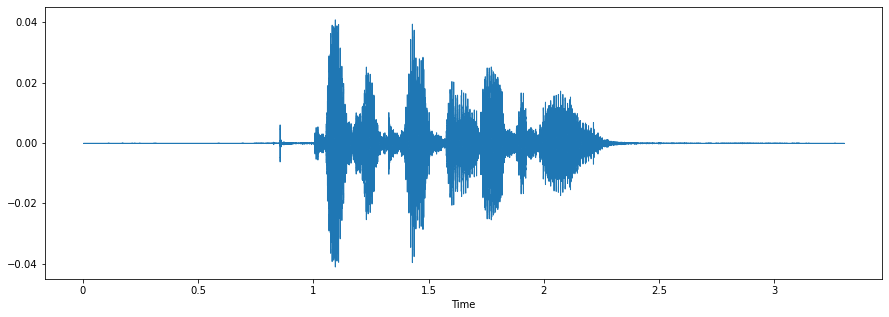

In [421]:
file = 'ravdess-data/Actor_01/03-01-01-01-01-01-01.wav'
data, sampling_rate = librosa.load(file)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)
ipd.Audio(file)

## Extract features (mfcc, chroma, mel) from a sound file

In [422]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
            result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
            #print(chroma)
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

## Dictionary of Emotions

In [423]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

## Loading data into the model

In [424]:
sum = 0
def load_data(test_size=0.20,sum = 0):
    x,y=[],[]
    for file in glob.glob("ravdess-data/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)


### Splitting the dataset

In [425]:
x_train,x_test,y_train,y_test=load_data(test_size=0.20)

/var/folders/pt/gpn4cp7j1nxgl3jnq5hlb3lr0000gq/T/ipykernel_58514/14497049.py:16: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/pt/gpn4cp7j1nxgl3jnq5hlb3lr0000gq/T/ipykernel_58514/14497049.py:16: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/pt/gpn4cp7j1nxgl3jnq5hlb3lr0000gq/T/ipykernel_58514/14497049.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.mels

## Printing

In [426]:
print(x_test)
print(y_test)
print(x_train)
print(y_train)

[[-6.50842468e+02  5.31168976e+01 -3.24820185e+00 ...  5.32868871e-05
   4.49146028e-05  2.97620118e-05]
 [-5.38224792e+02  2.15650196e+01 -1.39454908e+01 ...  6.58916135e-04
   6.73870032e-04  3.60335602e-04]
 [-5.66499573e+02  5.18425217e+01  1.13714657e+01 ...  5.27039054e-04
   2.64448259e-04  6.64254039e-05]
 ...
 [-6.44561218e+02  5.93864594e+01 -2.59522510e+00 ...  3.52405150e-05
   2.10023773e-05  6.03958370e-06]
 [-6.88169495e+02  7.49412231e+01 -2.50531030e+00 ...  5.26579151e-06
   2.36515712e-06  1.05838751e-06]
 [-6.93737000e+02  6.06338997e+01  2.44597588e+01 ...  3.39692742e-05
   2.36385695e-05  1.21766834e-05]]
['calm', 'fearful', 'disgust', 'disgust', 'happy', 'fearful', 'calm', 'happy', 'disgust', 'calm', 'happy', 'disgust', 'disgust', 'calm', 'happy', 'disgust', 'fearful', 'happy', 'disgust', 'happy', 'fearful', 'happy', 'happy', 'happy', 'fearful', 'happy', 'happy', 'happy', 'disgust', 'happy', 'happy', 'disgust', 'disgust', 'disgust', 'calm', 'disgust', 'calm', 'h

In [427]:
print((x_train.shape[0], x_test.shape[0]))

(614, 154)


In [428]:
print(x_train.shape[1], x_test.shape[1])

180 180


## Initialize and train the model

In [429]:
model=MLPClassifier(alpha=0.005, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(500,), learning_rate='adaptive', max_iter=300)
model.fit(x_train,y_train)

MLPClassifier(alpha=0.005, batch_size=256, hidden_layer_sizes=(500,),
              learning_rate='adaptive', max_iter=300)

## Predicting the y values for the test set

In [430]:
y_pred=model.predict(x_test)

## Accuracy Calculation

In [431]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 78.57%


## Confusion Matrix

In [432]:
confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)

array([[31,  6,  1,  0],
       [ 3, 41,  0,  2],
       [ 0,  5, 16,  5],
       [ 0,  6,  5, 33]])

In [433]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

plt.show()

/Users/Arshini/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


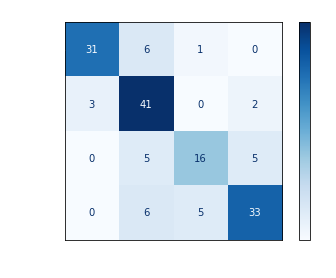

In [434]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
 
color = 'white'
matrix = plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()